In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Bivariate Data Exploration

## Quantitative Vs Quantitative

**Scatterplots** would be best to inspect relationships between two numeric values.

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   
5  32209       Lexus          GS 350  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   
5   Rear-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.5   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4   
1   94    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6   
2   94    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5   
3   94    0  16.9415  20.5000  25.2190   33.5000  19.8774  446        5   
4    0   95  24.7726  31.9796  35.5340   51.8816  28.6813  310        8   
5    0   99  19.4325  24.1499  28.2234   38.5000  22.6002  393        6   

   ghgScore  
0         4  
1         6  
2         5  
3         5  
4         8  
5         6

lets compare the engine displacement `displ` (in liters) to the overall mileage in `comb`. **_Is a larger engine associated with higher fuel efficiency? Lets see..._**

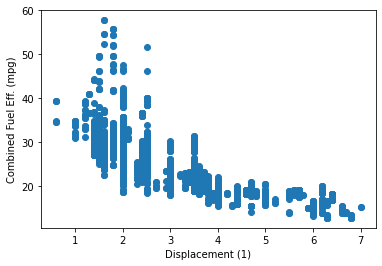

In [3]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Overall, there appears to be a negative correlation betweeen the two variables. As the engine size increases (x), fuel efficiency decreases (y). 

Let's make a different scatter plot using `sb.regplot` for a regression line:

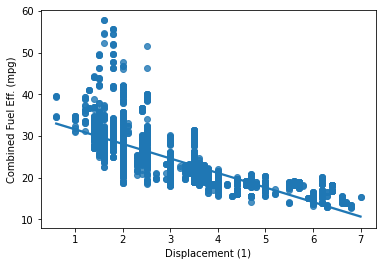

In [4]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Problem 1 - Overplotting

If we have a very large number of points to plot or our numeric variables are discrete-valued, our viz may result in **OVERPLOTTING**, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables. 

3 ways we can resolve this:

1. Use a *sample* or random selection of points
2. Use *transparency* to decrease density of our plot points
3. Use *jitter* to add a small amount of noise around each point to help better interpret trends


### EXAMPLE

lets compare fuel efficiency with the car's manufacturer year.

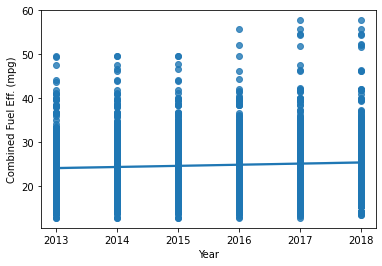

In [5]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb');
# add labels to each axis for clarity
plt.xlabel('Year')
plt.ylabel('Combined Fuel Eff. (mpg)');

Appears to be a slightly positive trend. It's not clear though. Lets use `jitter` first.

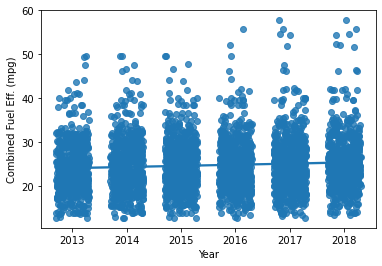

In [6]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);
# add labels to each axis for clarity
plt.xlabel('Year')
plt.ylabel('Combined Fuel Eff. (mpg)');

Adding width to each data point using jitter did help, but its still hard to see areas in the center. Lets add `transparency` to help:

        (note that this example would be better visualized with other charts, this is just a demo of how to use scatter plot features.)

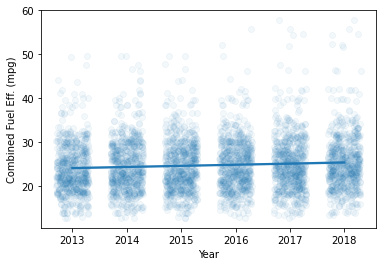

In [7]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
          scatter_kws = {'alpha' : 1/20} );
# add labels to each axis for clarity
plt.xlabel('Year')
plt.ylabel('Combined Fuel Eff. (mpg)');

### HEATMAPS

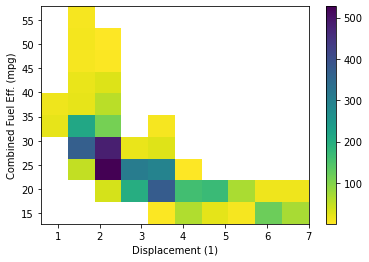

In [8]:
#create a heatmap - set the zero value as white to remove unnecessary coloring `cmin`, and reverse the color mapping
# to indicate higher values as darker `cmap`.
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r');
#place the colorbar on the chart
plt.colorbar()
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [9]:
# adjust the bins using np.arange. lets see what our values look like: use the min and max values 
# as an increment baseline.
fuel_econ[['displ', 'comb']].describe()

displ         comb
count  3929.000000  3929.000000
mean      2.950573    24.791339
std       1.305901     6.003246
min       0.600000    12.821700
25%       2.000000    20.658100
50%       2.500000    24.000000
75%       3.600000    28.227100
max       7.000000    57.782400

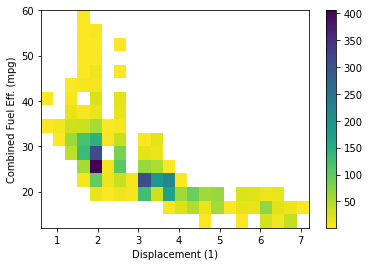

In [10]:
# adjust our bin sizes for our previous graph, adding our bin sizes variables in the argument
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
#place the colorbar on the chart
plt.colorbar()
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### LINE PLOTS

Used to plot the trend of one numeric variable against the values of a second variable.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot.

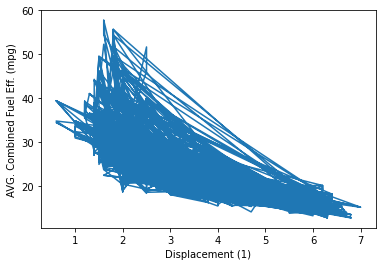

In [31]:
# use matplotlib's `errorbar()` function to process data for a lineplot
plt.errorbar(data=fuel_econ, x='displ', y='comb')

# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('AVG. Combined Fuel Eff. (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above.The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [36]:
# let's set up the bin edges and centers to summarize the data on the displacement values accurately.
# REMEMBER use `np.arange` to set your tick mark range. use `.describe` on your dataset (min + max values) for this part.
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

# Use the `pd.cut` function to figure out which bin each data point should be used in. the third argument 
# includes values equal to the min are included
displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)

# use `group_by` to group by those displacement bins we just set, then take the mean of points for each bin.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
# lets also grab the stcv while were at it.
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

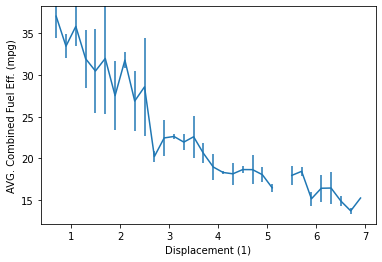

In [37]:
# replot our line plot! Change our arguments since we are not using our original dataframe. include stdv (optional)
plt.errorbar(x=bins_c, y= comb_mean, yerr = comb_std);

# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('AVG. Combined Fuel Eff. (mpg)');

Nice! From this chart it is clear to see that the fuel efficiency decreases as the engine size increases. The gap indicates where there is no data available.

Stdv also indicates that although smaller engines generally have a high fuel efficiency, theres also a larger amount of variability in those efficiencies.

## Quantitative Vs. Qualitative Variables
### VIOLIN PLOTS
**_violin plots_** make it easier to compare distributions between categorical data.

In [11]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars','Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

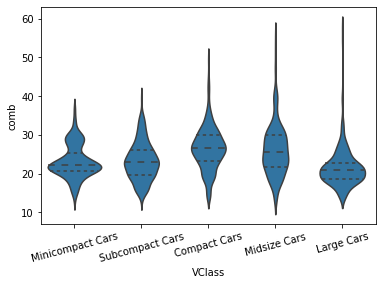

In [12]:
# adding color & label adjustments, and quartile lines for distribution clarity
basecolor = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb',
             color = basecolor, inner = 'quartile');
plt.xticks(rotation = 15);

#### Variation - Horizontal Orientation 

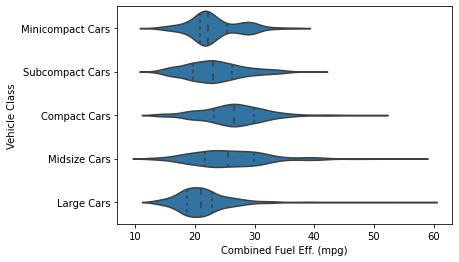

In [13]:
sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=basecolor, inner='quartile');
# add labels to each axis for clarity
plt.ylabel('Vehicle Class')
plt.xlabel('Combined Fuel Eff. (mpg)');

### BOXPLOTS
**_Boxplots_** are another way of showing the relationship between a numeric variable and a categorical variable. Compared to a violin plot, *the boxplot leans more on the summarization of the data using desscriptive statistics.*

These are more helpful when performing an *explanitory analysis* of our data

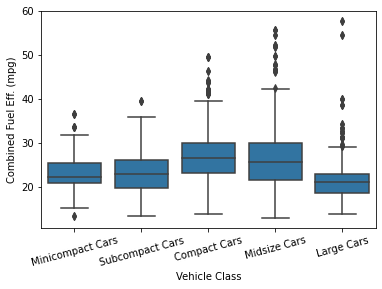

In [14]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=basecolor);
# add labels to each axis for clarity
plt.xlabel('Vehicle Class')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.xticks(rotation = 15);

## QUALitative Vs QUALitative
### CLUSTERED BAR CHARTS
**_Clustered bar charts_** are an excellent way to show the relationship between two *qualitative variables.* use `sb.countplot()` for this viz. 

However, to do this, we may need to process the second variable a little so it can be shown as a quantitative value along the y-axis, such as counting the frequency.

In [15]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column.
# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# use x.split to remove the subtype

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
fuel_econ.head(5)

id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   

   ...  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0  ...    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4   
1  ...    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6   
2  ...    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5   
3  ...    0  16.9415  20.5000  25.2190   33.5000  19.8774  446        5   
4  ...   95  24.7726  31.9796  35.5340   51.8816  28.6813  310        8   

   ghgScore  trans_type  
0         4   Automatic  
1         6   Automatic  
2         5   Automatic  
3         5   Automatic  
4         8   Automatic  

[5 rows x 21 columns]

In [16]:
# the `sb.heatmap` function requires a 2-d array or data frame with depicted values, 
# so we have to do some summarization work first.
fuel_econ.groupby(['VClass', 'trans_type']).size()

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [17]:
# we have our summarized data, now convert to a data frame using `reset_index`, and name our dataframe
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
# create a pivot table for better summarization
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts.head()

trans_type        Automatic  Manual
VClass                             
Minicompact Cars        188     133
Subcompact Cars         502     171
Compact Cars            784     338
Midsize Cars            989     199
Large Cars              605      20

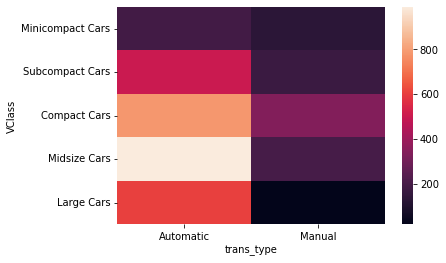

In [18]:
# a heatmap function for categorical data types
sb.heatmap(ct_counts);

Not too great. Its hard to interpret values on this viz, lets make some adjustments...

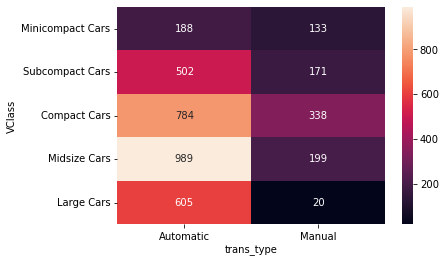

In [19]:
# add values, fmt ensures that all of the values are listed as decimal values.
sb.heatmap(ct_counts, annot = True, fmt = 'd');

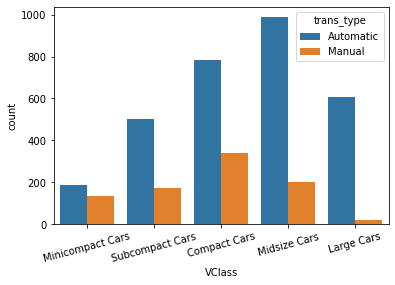

In [20]:
#compare heatmap to clustered bar chart, with color differentiation using the trans_type column
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
plt.xticks(rotation = 15);

## Extra Credit 1: Faceting

Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall.

1. can be used on different chart types. 
2. *good for breaking down* **COMPLEX PATTERNS** into *simpler results*
3. Good for Categorical Variables with a LOT of results

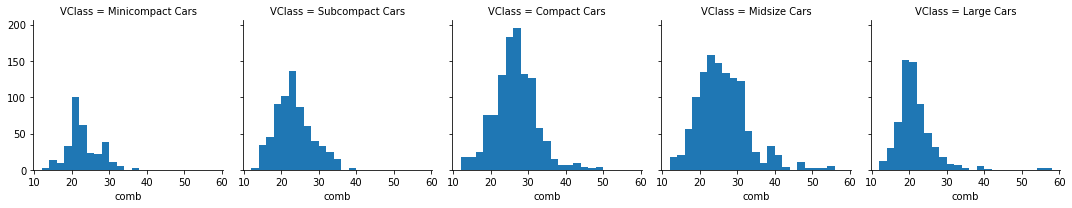

In [21]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass');
g.map(plt.hist, 'comb', bins = bins);

## Extra Credit 2: Adaptation of Univariate Plots

It's possible to make a univarite plot bivariate in nature.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable.

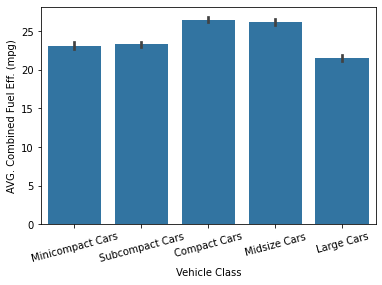

In [22]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=basecolor)
          # errwidth = 0); this removes the confidence interval 'whiskers'
# add labels to each axis for clarity
plt.xlabel('Vehicle Class')
plt.ylabel('AVG. Combined Fuel Eff. (mpg)');
plt.xticks(rotation = 15);

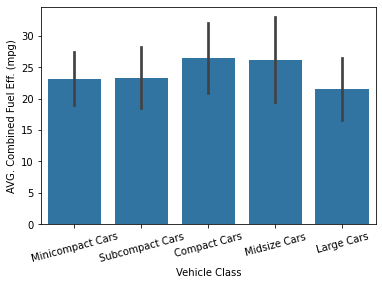

In [23]:
# you can also change the bars to represent the standard deviation with the `ci` argument:
sb.barplot(data=fuel_econ, x='VClass', y='comb', 
           color=basecolor, ci = 'sd')
# add labels to each axis for clarity
plt.xlabel('Vehicle Class')
plt.ylabel('AVG. Combined Fuel Eff. (mpg)');
plt.xticks(rotation = 15);

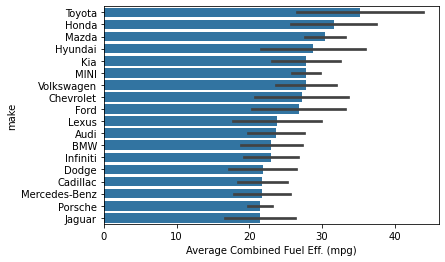

In [41]:
# another variation - horizontal bar chart, comparing makes with avg fuel efficiency.
# bars represent standard deviation for each make.

# step 1: data setup
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)
most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]
make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index
# step 2: plotting
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
           color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

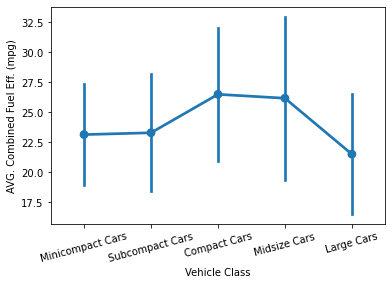

In [28]:
# you can also create a pointplot:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci = 'sd')
            # linestyles = " ") will remove the connecting line. Good for if this were nominal data 
# add labels to each axis for clarity
plt.xlabel('Vehicle Class')
plt.ylabel('AVG. Combined Fuel Eff. (mpg)');
plt.xticks(rotation = 15);
# a line connects each subset, which is fine since are in order of car size